MEM T380

Case Studies Group 10

Ante Sokosa
Ziad Hatab

HW3 - Regression Prediction of Bead Geometry for GMAW-based Rapid Manufacturing

In [1]:
# for calculating notebook runtime
import time
start_time = time.time()

# 1 &nbsp; `Data Exploration`

In [2]:
import pandas as pd

df_train_raw = pd.read_excel('bead_geometry.xlsx', sheet_name='training_data')
df_test_raw = pd.read_excel('bead_geometry.xlsx', sheet_name='testing_data')
df_all_raw = pd.concat([df_train_raw, df_test_raw], ignore_index=True)
df_all_raw.head()

,F,S,V,D,W,H
0,3.6,22.5,17.5,9,8.95,2.88
1,5.2,22.5,17.5,9,10.72,3.35
2,3.6,37.5,17.5,9,7.19,2.45
3,5.2,37.5,17.5,9,8.29,2.75
4,3.6,22.5,20.5,9,10.25,2.66


The column names in our dataset are not clear at first but can be quickly understood, thus we will keep the names as they are.  
For reference we will list the column names and their meaning as established by the research paper, below:

independent variables / predictors / regressors:
- **F** = **Feed** Rate (m/mm)
- **S** = Welding **Speed** (cm/min) 
- **V** = Arc **Voltage** (V)
- **D** = Nozzle-to-Plate **Distance** (mm)
 
dependent variables / response:
- **W** = **Width** of Bead (mm)
- **H** = **Height** of Bead (mm)

In [3]:
independant_vars = ['F','S','V','D']
dependant_vars = ['W','H']

In [4]:
df_all_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       43 non-null     float64
 1   S       43 non-null     float64
 2   V       43 non-null     float64
 3   D       43 non-null     int64  
 4   W       43 non-null     float64
 5   H       43 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.1 KB


The dataframe does not have any missing values.  
However, `Distance` is an int and not a float, thus it may have non continuous values. Lets investigate this further.

In [5]:
df_all_raw['D'].value_counts()

12    25
9      8
15     8
6      1
18     1
Name: D, dtype: int64

We were correct to assume that `Distance` has not many continuous values. It has only 3 main unique values with an additional 2 unique values but they are only 1 each.

In [6]:
df_all_raw['F'].value_counts()

4.4    14
5.2    12
3.6     8
4.0     5
6.0     3
2.8     1
Name: F, dtype: int64

However, other feature columns also have few unique values as seen with `Feed` above. Thus, we will leave `Distance` as is, even making it a float column as in the research paper. It does not need to be made categorical.

In [7]:
df_train_raw['D'] = df_train_raw['D'].astype(float)
df_test_raw['D'] = df_test_raw['D'].astype(float)
df_all_raw['D'] = df_all_raw['D'].astype(float)
df_all_raw.head()

,F,S,V,D,W,H
0,3.6,22.5,17.5,9.0,8.95,2.88
1,5.2,22.5,17.5,9.0,10.72,3.35
2,3.6,37.5,17.5,9.0,7.19,2.45
3,5.2,37.5,17.5,9.0,8.29,2.75
4,3.6,22.5,20.5,9.0,10.25,2.66


In [8]:
df_all_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       43 non-null     float64
 1   S       43 non-null     float64
 2   V       43 non-null     float64
 3   D       43 non-null     float64
 4   W       43 non-null     float64
 5   H       43 non-null     float64
dtypes: float64(6)
memory usage: 2.1 KB


In [9]:
df_all_raw.describe()

,F,S,V,D,W,H
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,4.502326,30.279070,18.793023,12.000000,8.997326,2.865419
std,0.746257,6.540444,1.365980,2.267787,1.226242,0.358247
min,2.800000,15.000000,16.000000,6.000000,6.830000,2.170000
25%,4.000000,24.750000,17.500000,12.000000,8.030000,2.681000
50%,4.400000,30.000000,19.000000,12.000000,8.920000,2.811000
75%,5.200000,37.500000,19.650000,12.000000,9.874500,3.023500
max,6.000000,45.000000,22.000000,18.000000,11.760000,3.800000


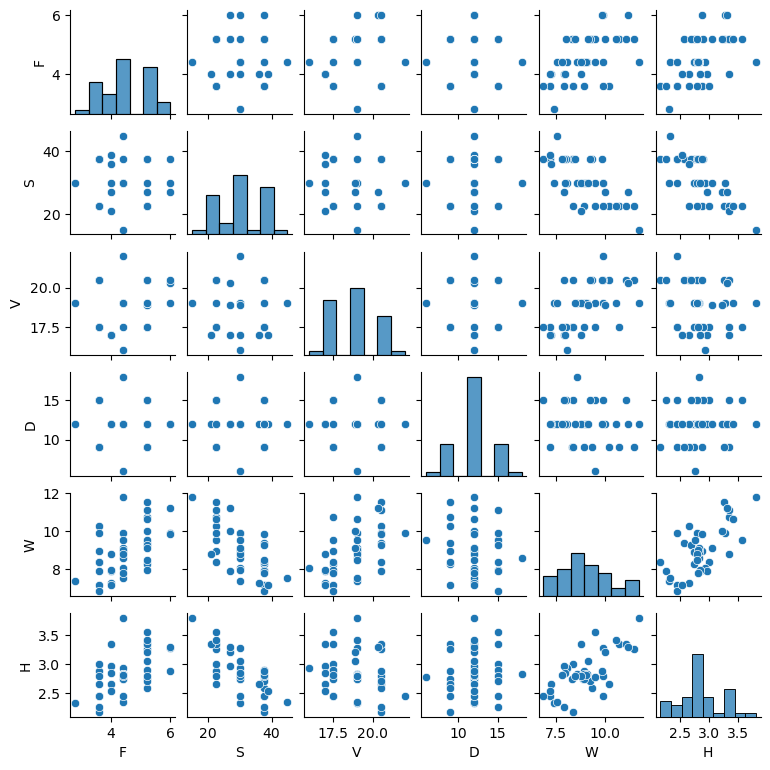

In [10]:
import seaborn as sns

sns.pairplot(df_all_raw, height=1.3)

We are able to see a clear linear trend between `Width` and `Height` of the bead.  
From independent variables to other independent variables we do not see any clear trends.  
However, this makes sense as they are independent variables.  
We do see slight trends between independent variables and dependent variables. 
 
For example, `Width` and `Height` seem to generally increase with `Feed` and decrease with `Speed`. However, as `Voltage` increases, `Width` increases while `Height` dereases. The same happends with `Distance` but to a lesser extent, even being a stretch to call it a trend. However, perhaps a combination of all of these independent variables will show a clearer trend.

Lets check visual inferences from the scatter plot of the data with a correlation matrix.

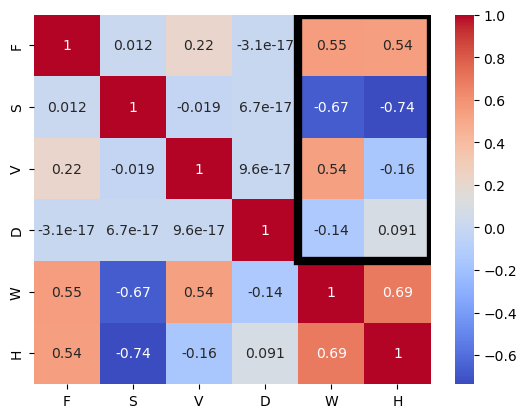

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

corr_raw = df_all_raw.corr()
ax = sns.heatmap(corr_raw, annot=True, cmap='coolwarm')

rectangle = Rectangle((4, 0), 2, 4, fill=False, edgecolor='black', lw=6)
ax.add_patch(rectangle)
plt.draw()

plt.show()

Our visual inferences were mostly correct. There is little to no correlation between independent variables. We were correct in our inferences of `Feed`, `Speed`, and `Voltage` with `Width` and `Height`. However, we were incorrect in `Distance` vs `Width` and `Height`. It is slightly opposite of what we visually inferred. The main cells of the heatmap we are intereted in are boxed in black on the correlation matrix heatmap above. 

Additionally, standardization may be able to help. (We will use standardization, not normalization due to the one off unique type values we found in some columns suh as `Distance` and `Feed` earlier. We don't want them to squeeze any features into a small range.)

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_all_raw_std = std_scaler.fit_transform(df_all_raw)
df_all_raw_std = pd.DataFrame(df_all_raw_std, columns=df_all_raw.columns)
df_all_raw_std.describe()

,F,S,V,D,W,H
count,4.300000e+01,4.300000e+01,4.300000e+01,43.000000,4.300000e+01,4.300000e+01
mean,4.853998e-16,-6.196594e-17,4.182701e-16,0.000000,-7.126083e-16,8.200804e-16
std,1.011835e+00,1.011835e+00,1.011835e+00,1.011835,1.011835e+00,1.011835e+00
min,-2.308149e+00,-2.363738e+00,-2.068901e+00,-2.677063,-1.788371e+00,-1.964142e+00
25%,-6.810932e-01,-8.553708e-01,-9.577925e-01,0.000000,-7.981898e-01,-5.208723e-01
50%,-1.387412e-01,-4.317329e-02,1.533157e-01,0.000000,-6.380529e-02,-1.537000e-01
75%,9.459628e-01,1.117109e+00,6.347959e-01,0.000000,7.238014e-01,4.464854e-01
max,2.030667e+00,2.277391e+00,2.375532e+00,2.677063,2.279624e+00,2.639634e+00


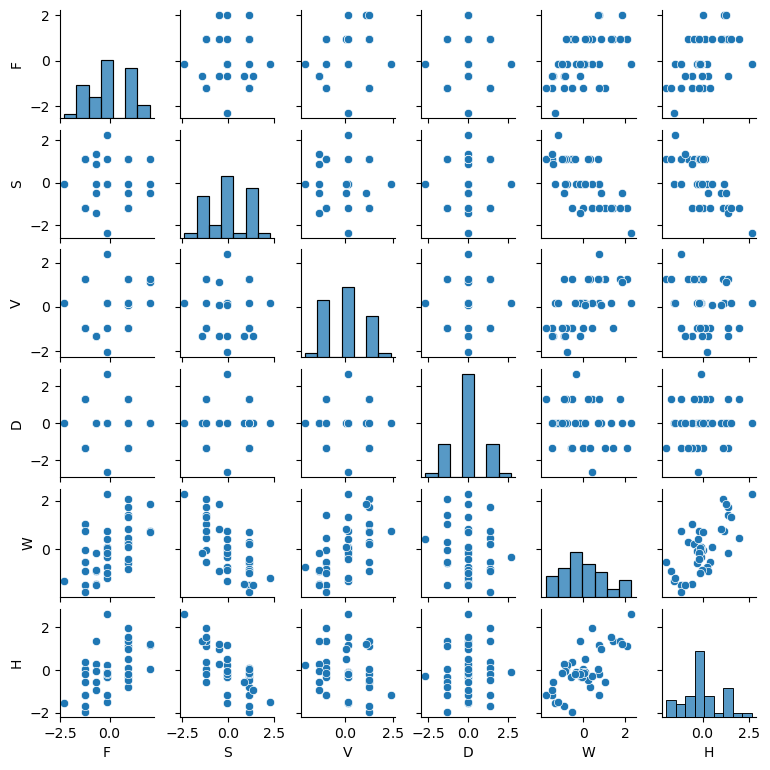

In [13]:
sns.pairplot(df_all_raw_std, height=1.3)

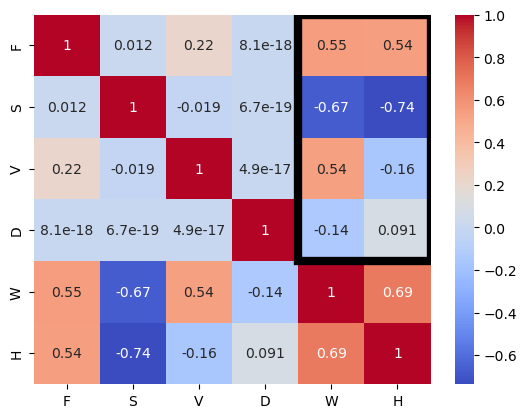

In [14]:
corr_raw_std = df_all_raw_std.corr()
ax_std = sns.heatmap(corr_raw_std, annot=True, cmap='coolwarm')

rectangle = Rectangle((4, 0), 2, 4, fill=False, edgecolor='black', lw=6)
ax_std.add_patch(rectangle)
plt.draw()

plt.show()

Standardization didn't make much of a difference for us to see any trends clearer. However, we will stick with this as the data for our regrssion analysis.

In [15]:
df_train_raw_std = std_scaler.fit_transform(df_train_raw)
df_train_raw_std = pd.DataFrame(df_train_raw_std, columns=df_train_raw.columns)
df_test_raw_std = std_scaler.fit_transform(df_test_raw)
df_test_raw_std = pd.DataFrame(df_test_raw_std, columns=df_test_raw.columns)

df_train = df_train_raw_std.copy()
df_test = df_test_raw_std.copy()
df_all = df_all_raw_std.copy()

df_all.head()

,F,S,V,D,W,H
0,-1.223445,-1.203455,-0.957793,-1.338532,-0.039051,0.041184
1,0.945963,-1.203455,-0.957793,-1.338532,1.421467,1.368653
2,-1.223445,1.117109,-0.957793,-1.338532,-1.491317,-1.173309
3,0.945963,1.117109,-0.957793,-1.338532,-0.583650,-0.325989
4,-1.223445,-1.203455,1.264424,-1.338532,1.033646,-0.580185


In conclusion of our data exploration, `Feed`, `Speed`, and `Voltage` seem to be the most important features for predicting `Width` and `Height` of the bead, with `Speed` being the strongest. (`Voltage` has a much lower impact on `Height` than `Width` though.) `Distance` is not as important but still has some effect on the bead geometry (more so for `Width` than `Height`).

# 2 &nbsp; `Regression with Ordinary Least-Squares (OLS)`



## 2.1 &nbsp; `Simple Linear Regression`



Using our strongest independebnt and dependent variables, `Speed` and `Height` respectively, we can write down the mathematical expression for the linear univariate model:  
$H = \beta_0 + \beta_1 * S + \epsilon$  
where $\beta_0$ is the intercept, $\beta_1$ is the slope, and $\epsilon$ is the error term. We will not be including the error term in our simple model though.

In [16]:
from sklearn.linear_model import LinearRegression

x_S_all = df_all[['S']]  # double brackets keep x as a DataFrame even though it is only one column. using lowercase x though
y_H_all = df_all['H']

SLR_model_S_H = LinearRegression()
SLR_model_S_H.fit(x_S_all, y_H_all)

print('Intercept:         ', SLR_model_S_H.intercept_)
print('Coefficient/Slope: ', SLR_model_S_H.coef_)
print('R^2:               ', SLR_model_S_H.score(x_S_all,y_H_all))

Intercept:          7.744236350924402e-16
Coefficient/Slope:  [-0.73680485]
R^2:                0.5428813918395083


As the data was standerdized, the intercept as expected is ~0.  
The slope is ~-0.74, which means that for every 1 unit increase in `Speed`, `Height` decreases by ~0.74 units. This is exactly as shown in the correlation matrix heatmap before.  
The $R^2$ value of ~0.54 means that the model explains only 54% of the variability of the data. 46% of the data will be way off the regression line. This is not a very good model, and we are not even using different training and testing sets yet!  
We can see this shown in the plot below:

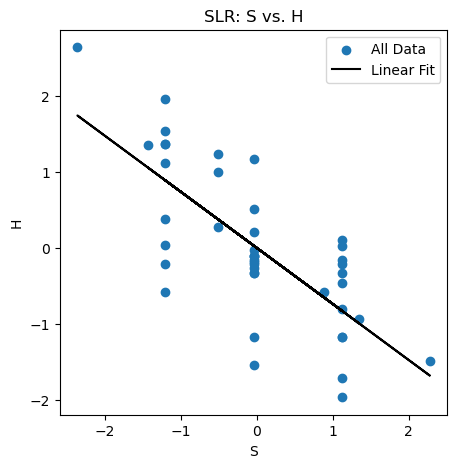

In [17]:
df_all['H_pred_from_S'] = SLR_model_S_H.predict(x_S_all)

fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.scatter(df_all['S'], df_all['H'], label='All Data')
ax1.plot(df_all['S'], df_all['H_pred_from_S'], color='black', label='Linear Fit')
ax1.set_xlabel('S')
ax1.set_ylabel('H')
ax1.set_title('SLR: S vs. H')
ax1.legend()
plt.show()


Lets take a look at the second strongest independent variable, `Feed` and the other dependent variable, `Width`.  
We can do the same analysis as with `Speed` and `Height` above.

In [18]:
x_F_all = df_all[['F']]
y_W_all = df_all['W']

SLR_model_F_W = LinearRegression()
SLR_model_F_W.fit(x_F_all, y_W_all)

print('Intercept:         ', SLR_model_F_W.intercept_)
print('Coefficient/Slope: ', SLR_model_F_W.coef_)
print('R^2:               ', SLR_model_F_W.score(x_F_all,y_W_all))

Intercept:          -9.786784380785485e-16
Coefficient/Slope:  [0.5481464]
R^2:                0.3004644747714442


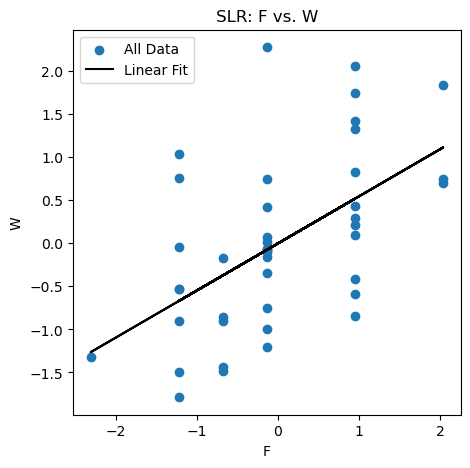

In [19]:
df_all['W_pred_from_F'] = SLR_model_F_W.predict(x_F_all)

fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.scatter(df_all['F'], df_all['W'], label='All Data')
ax1.plot(df_all['F'], df_all['W_pred_from_F'], color='black', label='Linear Fit')
ax1.set_xlabel('F')
ax1.set_ylabel('W')
ax1.set_title('SLR: F vs. W')
ax1.legend()
plt.show()

Again we see the 0 intercept, slope as in the correlation matrix heatmap, and a low $R^2$ value. These models are not adequate to fit the data.  
We need to combine more independent variables to get a better model for more correct predictions.

## 2.2 &nbsp; `Multivariable Polynomial Regression`



In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate all polynomial features up to degree 2 (including interaction terms)
MSDR_poly = PolynomialFeatures(degree=2, include_bias=False)

MSDR = LinearRegression() # MSDR = Multivariable Second-Degree Regression

# Create a pipeline that first transforms the features to polynomial features, then applies linear regression
MSDR_model = make_pipeline(MSDR_poly, MSDR)

# feature names for 2nd degree polynomial
feature_names = independant_vars + ['F^2','S^2','V^2','D^2'] + ['F*S', 'F*V', 'F*D','S*V', 'S*D', 'V*D']

# Fit the model separately for W and H
for dependant_var in dependant_vars:

    X_train= df_train[independant_vars]
    y_train = df_train[dependant_var]

    X_test = df_test[independant_vars]
    y_test = df_test[dependant_var]

    MSDR_model.fit(X_train, y_train)

    print(f'Model coefficients for {dependant_var}:')
    print('Intercept:', MSDR_model.named_steps['linearregression'].intercept_)
            
    coefficients = MSDR_model.named_steps['linearregression'].coef_

    for feature_name, coeff in zip(feature_names, coefficients):
        print(f'{feature_name}: {coeff}')
    
    print('R^2 value training set:', MSDR_model.score(X_train,y_train))
    print('R^2 value testing  set:', MSDR_model.score(X_test,y_test))
    print('\n')

Model coefficients for W:
Intercept: -0.10195499700587468
F: 0.4644680618317247
S: -0.7323588531685801
V: 0.41733912631875925
D: -0.1730128027383858
F^2: -0.04612528247570835
S^2: -0.03273784307528102
V^2: -0.016368921537640444
D^2: -0.010639798999466401
F*S: 0.11838237897757883
F*V: -0.02700872053710706
F*D: 0.052380548920449854
S*V: 0.01034749682915133
S*D: 0.04910676461292158
V*D: 0.01935040367485357
R^2 value training set: 0.9896894480390439
R^2 value testing  set: 0.9219455266031096


Model coefficients for H:
Intercept: -0.06749653951574566
F: 0.5636272501722791
S: -0.7413030908570605
V: -0.25170744097010717
D: 0.10167006439184738
F^2: -0.004621775913532115
S^2: -0.07686416586397948
V^2: 0.029963996862229426
D^2: 0.02996399686222944
F*S: 0.13607873109171845
F*V: -0.014330607194979422
F*D: -0.02475286697314596
S*V: -0.05933863974890757
S*D: -0.006513912361354202
V*D: -0.004621775913532272
R^2 value training set: 0.9856702023184508
R^2 value testing  set: 0.937031679429238




These polynomial models here in `2.2` perform much better than the simple linear regression models from `2.1`. The $R^2$ values for both dependent variables are now much higher, both at above 0.90 for all sets. Note if using the same data set as training and testing as was done in the SLR models, we get all the way to 98% for both dependent variables. 

## 2.3 &nbsp; `Predicting with Multivariable Polynomial Regression`



# 3 &nbsp; `Regression with Decision Trees (RDT)`



In [21]:
end_time = time.time()
print(f'Total runtime of this notebook is {(end_time-start_time)/60:0.2f} minutes.')

Total runtime of this notebook is 0.35 minutes.
